In [8]:
import os
import shutil
import random
import tensorflow as tf
from tensorflow.keras import layers, Sequential

def split_dataset(data_source, data_train, data_test, data_predict, split_ratio=(0.7, 0.15, 0.15)):
    if sum(split_ratio) != 1.0:
        raise ValueError("Split ratio should sum up to 1.0")

    for class_name in os.listdir(data_source):
        class_dir = os.path.join(data_source, class_name)
        if os.path.isdir(class_dir):
            files = os.listdir(class_dir)
            random.shuffle(files)
            num_files = len(files)

            train_split = int(num_files * split_ratio[0])
            test_split = int(num_files * split_ratio[1])

            train_files = files[:train_split]
            test_files = files[train_split:train_split + test_split]
            predict_files = files[train_split + test_split:]

            # Copy files to respective directories
            for filename in train_files:
                src = os.path.join(class_dir, filename)
                dst = os.path.join(data_train, class_name)
                try:
                    os.makedirs(dst, exist_ok=True)
                    shutil.copy(src, dst)
                except PermissionError as e:
                    print(f"Permission error: {e}")

            for filename in test_files:
                src = os.path.join(class_dir, filename)
                dst = os.path.join(data_test, class_name)
                try:
                    os.makedirs(dst, exist_ok=True)
                    shutil.copy(src, dst)
                except PermissionError as e:
                    print(f"Permission error: {e}")

            for filename in predict_files:
                src = os.path.join(class_dir, filename)
                dst = os.path.join(data_predict, class_name)
                try:
                    os.makedirs(dst, exist_ok=True)
                    shutil.copy(src, dst)
                except PermissionError as e:
                    print(f"Permission error: {e}")

data_source = "D:/projml/MY_data"
data_train = "D:/projml/MY_data/train"
data_test = "D:/projml/MY_data/test"
data_predict = "D:/projml/MY_data/predict"

split_dataset(data_source, data_train, data_test, data_predict)

img_width = 180
img_height = 180

data_train = tf.keras.utils.image_dataset_from_directory(
    data_train,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=None
)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_width, img_height, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(data_train.class_names))
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(data_train, epochs=25)

model.save('Image_classification_model.h5')


Permission error: [Errno 13] Permission denied: 'D:/projml/MY_data\\predict\\test'
Permission error: [Errno 13] Permission denied: 'D:/projml/MY_data\\predict\\testtest'
Permission error: [Errno 13] Permission denied: 'D:/projml/MY_data\\predict\\train'
Permission error: [Errno 13] Permission denied: 'D:/projml/MY_data\\predict\\predict'
Permission error: [Errno 13] Permission denied: 'D:/projml/MY_data\\test\\mango'
Permission error: [Errno 13] Permission denied: 'D:/projml/MY_data\\test\\stawberries'
Permission error: [Errno 13] Permission denied: 'D:/projml/MY_data\\test\\avocado'
Permission error: [Errno 13] Permission denied: 'D:/projml/MY_data\\test\\pinenapple'
Permission error: [Errno 13] Permission denied: 'D:/projml/MY_data\\test\\predict'
Permission error: [Errno 13] Permission denied: 'D:/projml/MY_data\\test\\test'
Permission error: [Errno 13] Permission denied: 'D:/projml/MY_data\\test\\banana'
Permission error: [Errno 13] Permission denied: 'D:/projml/MY_data\\test\\trai

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 227ms/step - accuracy: 0.1511 - loss: 2.7080
Epoch 2/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 213ms/step - accuracy: 0.3500 - loss: 1.8010
Epoch 3/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 216ms/step - accuracy: 0.5072 - loss: 1.4524
Epoch 4/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 207ms/step - accuracy: 0.6017 - loss: 1.2226
Epoch 5/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 210ms/step - accuracy: 0.6449 - loss: 1.0891
Epoch 6/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 211ms/step - accuracy: 0.7528 - loss: 0.7655
Epoch 7/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 211ms/step - accuracy: 0.8290 - loss: 0.5602
Epoch 8/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 213ms/step - accuracy: 0.8908 - loss: 0.3531
Epoch 9/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 212ms/step - accuracy: 0.9234 - loss: 0.2525
Epoch 10/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 214ms/step - accuracy: 0.9519 - loss: 0.1880
Epoch 11/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 213ms/step - accuracy: 0.9780 - loss: 0.1222
Epoch 12/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 16

KeyError: 'val_accuracy'

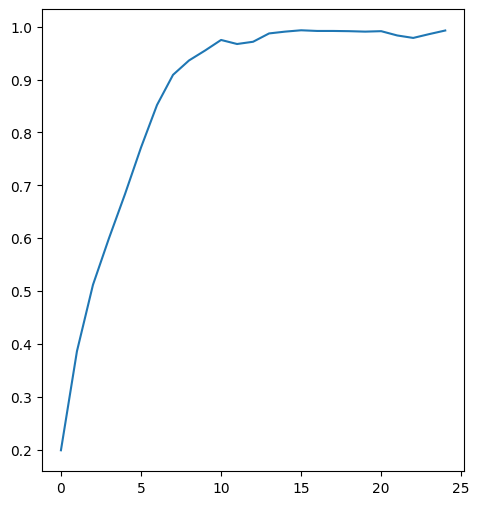

In [9]:
import matplotlib.pyplot as plt

epochs_range = range(len(history.history['accuracy']))  # Use len(history.history['accuracy']) to get the number of epochs

plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
def predict_image(image_path, model):
    # Preprocess the input image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_width, img_height))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    # Make predictions
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    # Get the predicted class and probability
    predicted_class = data_train.class_names[np.argmax(score)]
    probability = 100 * np.max(score)

    return predicted_class, probability

# Path to the image you want to predict
image_path = "D:\\projml\\ml.jpeg"

# Load the trained model
model = tf.keras.models.load_model("Image_classification_model.h5")

# Predict the image
predicted_class, probability = predict_image(image_path, model)

# Display the prediction
print(f"The predicted class is: {predicted_class}")
print(f"The probability of the prediction is: {probability:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
The predicted class is: Apple
The probability of the prediction is: 100.00%
